In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [119]:
# Supress warnings 
import warnings
warnings.filterwarnings('ignore')

In [120]:
# Classification 

# from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn import svm
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split
# from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline

from sklearn import metrics

from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB  
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis  
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

In [121]:
# Regression 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor  
from sklearn.svm import SVC 

In [122]:
# Model ling Helpers . 
from sklearn.preprocessing import Normalizer , scale 
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import RFECV 
from sklearn.model_selection import KFold ,cross_val_score, ShuffleSplit, cross_validate 

# Preprocessing 
from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder  
from sklearn.impute import SimpleImputer 


# Classification 
from sklearn.metrics import recall_score, f1_score, fbeta_score, r2_score, roc_auc_score, roc_curve, auc, cohen_kappa_score  



In [123]:
df = pd.read_csv('train.csv')

In [124]:
df.info()
df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes
5,6,1,1,0,0,1,1,1,1,1,1,21,8,m,black,no,no,family member,Yes
6,7,1,0,0,1,1,1,0,0,1,0,33,5,m,asian,yes,no,family member,Yes
7,8,0,1,0,0,1,0,1,1,1,1,33,6,m,asian,yes,no,family member,Yes
8,9,0,0,0,0,0,0,1,0,0,1,36,2,m,asian,no,no,family member,No
9,10,1,1,1,0,1,1,0,1,1,1,22,8,m,south asian,no,no,Health Care Professional,Yes


In [125]:
df.shape

(1054, 19)

In [126]:
df.describe()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,527.500000,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,5.212524
std,304.407895,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,2.907304
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,264.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.000000
50%,527.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,5.000000
75%,790.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,8.000000
max,1054.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000


In [127]:
df.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')

In [128]:
df.drop(['Case_No', 'Who completed the test'],axis = 1,inplace = True)
df.columns 

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Class/ASD Traits '],
      dtype='object')

In [129]:
df.shape

(1054, 17)

In [130]:
# Calculating the percentage of babies shows the symptoms of autisim 
yes_autism=df[df['Class/ASD Traits ']=='Yes']
no_autism=df[df['Class/ASD Traits ']=='No']
print("Toddlers yes:",round(len(yes_autism)/len(df) * 100, 2))
print("Toddlers no:",round(len(no_autism)/len(df) * 100, 2))

Toddlers yes: 69.07
Toddlers no: 30.93


In [131]:
# Displaying the content of the target column 
df['Class/ASD Traits '].value_counts() 

Class/ASD Traits 
Yes    728
No     326
Name: count, dtype: int64

In [132]:
df.isnull().sum()


A1                     0
A2                     0
A3                     0
A4                     0
A5                     0
A6                     0
A7                     0
A8                     0
A9                     0
A10                    0
Age_Mons               0
Qchat-10-Score         0
Sex                    0
Ethnicity              0
Jaundice               0
Family_mem_with_ASD    0
Class/ASD Traits       0
dtype: int64

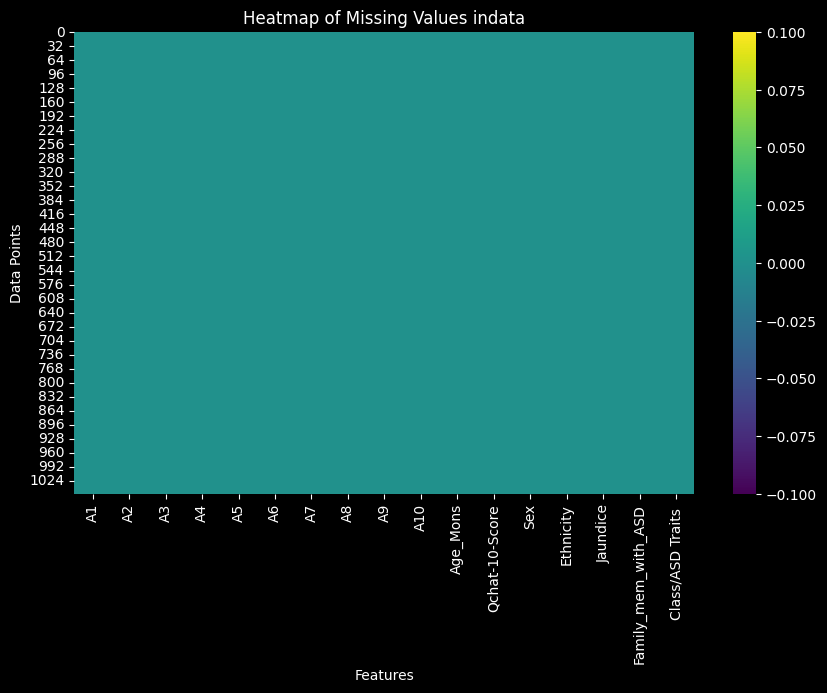

In [133]:
plt.figure(figsize=(10, 6))
sb.heatmap(df.isnull(), cbar=True, cmap='viridis')
plt.title('Heatmap of Missing Values indata')
plt.xlabel('Features')
plt.ylabel('Data Points')
plt.show()

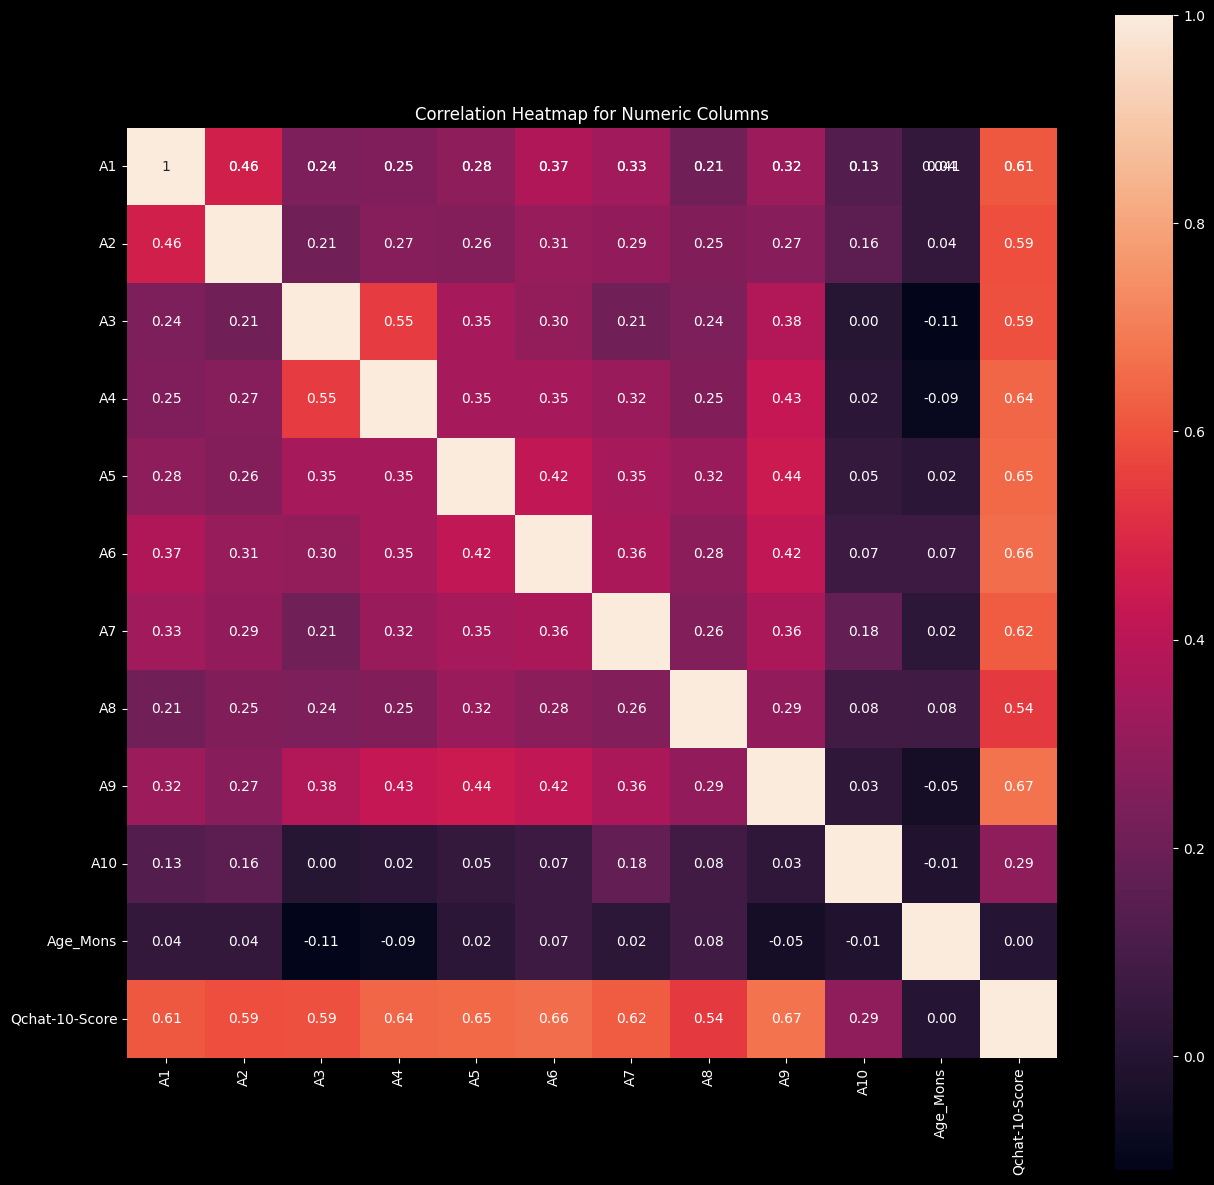

In [134]:
numeric_df = df.select_dtypes(include=[ 'int'])
corr = numeric_df.corr()
plt.figure(figsize = (15, 15)) 
sb.heatmap(data = corr, annot = True, square = True, cbar = True)
# Add custom annotations
for i in range(len(corr)):
    for j in range(len(corr.columns)):
        if i != j:
            plt.text(j + 0.5, i + 0.5, f"{corr.iloc[i, j]:.2f}", ha='center', va='center', color='white')
plt.title('Correlation Heatmap for Numeric Columns')
plt.show()

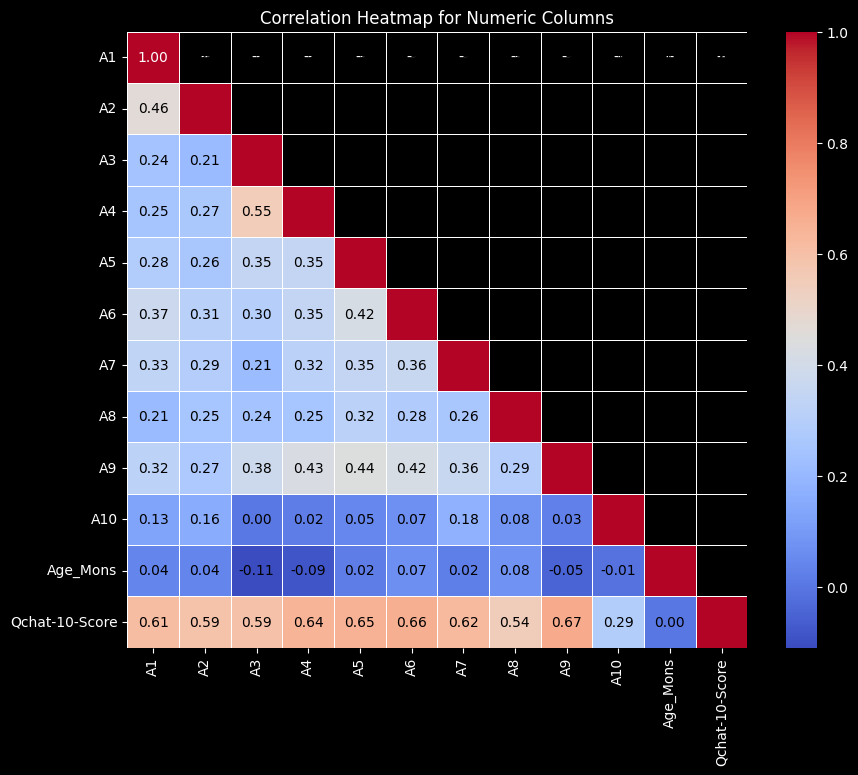

In [135]:
numeric_df = df.select_dtypes(include=['int'])
# Or use the following line to impute non-numeric columns
# numeric_df = df.apply(pd.to_numeric, errors='coerce').dropna()

# Calculate the correlation matrix
corr = numeric_df.corr()

# Create a mask for the upper triangle of the correlation matrix
# Set k=1 to exclude the diagonal as well
mask = np.triu(np.ones_like(corr, dtype=bool), k=1) 
# Set up the matplotlib figure
plt.figure(figsize=(10,8))

# Plot correlation heatmap with annotations
sb.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, mask=mask)

for i in range(len(corr)):
    for j in range(len(corr.columns)):
        if i != j:
            plt.text(j + 0.5, i + 0.5, f"{corr.iloc[i, j]:.2f}", ha='center', va='center', color='black')


plt.title('Correlation Heatmap for Numeric Columns')
plt.show()

In [136]:
df.dtypes

A1                      int64
A2                      int64
A3                      int64
A4                      int64
A5                      int64
A6                      int64
A7                      int64
A8                      int64
A9                      int64
A10                     int64
Age_Mons                int64
Qchat-10-Score          int64
Sex                    object
Ethnicity              object
Jaundice               object
Family_mem_with_ASD    object
Class/ASD Traits       object
dtype: object

In [137]:
le = LabelEncoder()
columns = ['Ethnicity' , 'Family_mem_with_ASD', 'Sex', 'Jaundice', 'Class/ASD Traits '] 
for col in columns: 
	df[col] = le.fit_transform(df[col]) 
df.dtypes 

A1                     int64
A2                     int64
A3                     int64
A4                     int64
A5                     int64
A6                     int64
A7                     int64
A8                     int64
A9                     int64
A10                    int64
Age_Mons               int64
Qchat-10-Score         int64
Sex                    int32
Ethnicity              int32
Jaundice               int32
Family_mem_with_ASD    int32
Class/ASD Traits       int32
dtype: object

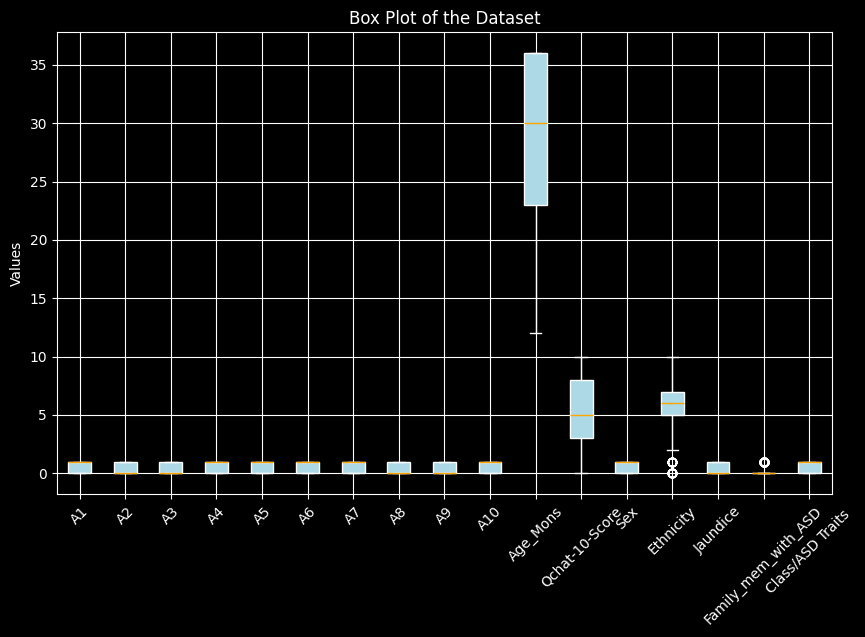

In [138]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
# Assuming you've calculated Q1, Q3, and IQR as mentioned in your code snippet

# Creating a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df.values, patch_artist=True, medianprops=dict(color='orange'), boxprops=dict(facecolor='lightblue'))

# Adding labels and title
plt.xticks(range(1, len(df.columns) + 1), df.columns, rotation=45)
plt.ylabel('Values')
plt.title('Box Plot of the Dataset')

# Adding gridlines
plt.grid(True)

# Show plot
plt.show()


In [139]:
# Detecting outliers with IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

A1                      1.0
A2                      1.0
A3                      1.0
A4                      1.0
A5                      1.0
A6                      1.0
A7                      1.0
A8                      1.0
A9                      1.0
A10                     1.0
Age_Mons               13.0
Qchat-10-Score          5.0
Sex                     1.0
Ethnicity               2.0
Jaundice                1.0
Family_mem_with_ASD     0.0
Class/ASD Traits        1.0
dtype: float64


In [140]:
# Removing outliers from dataset
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(830, 17)

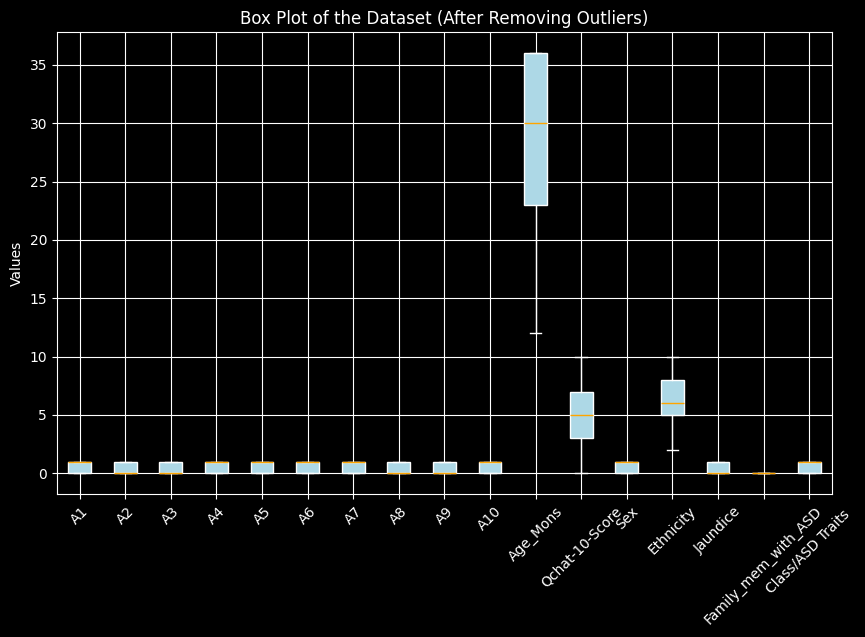

In [141]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your modified DataFrame after removing outliers

# Creating a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df.values, patch_artist=True, medianprops=dict(color='orange'), boxprops=dict(facecolor='lightblue'))

# Adding labels and title
plt.xticks(range(1, len(df.columns) + 1), df.columns, rotation=45)
plt.ylabel('Values')
plt.title('Box Plot of the Dataset (After Removing Outliers)')

# Adding gridlines
plt.grid(True)

# Show plot
plt.show()


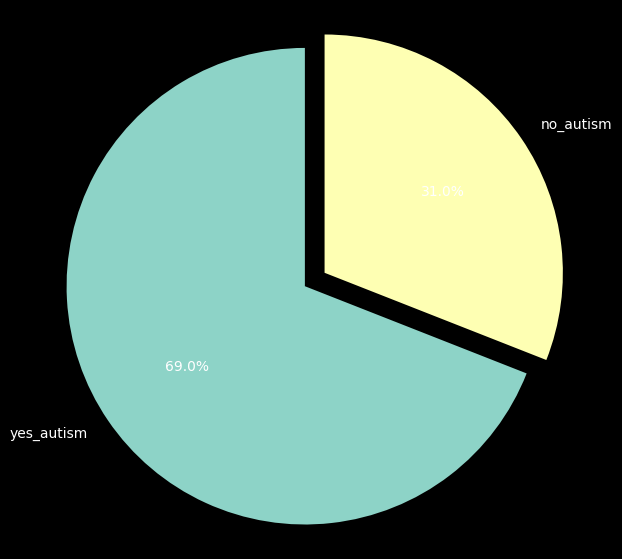

In [142]:
import matplotlib.pyplot as plt 
fig = plt.figure()
fig.set_size_inches(7,7) 
plt.pie(df["Class/ASD Traits "].value_counts(),labels=('yes_autism','no_autism'),explode = [0.1,0], autopct = '%1.1f%%' ,startangle = 90,labeldistance = 1.1) 
plt.axis('equal') 
plt.show() 

In [143]:
no_autism['Ethnicity'].value_counts()

Ethnicity
middle eastern    92
asian             87
White European    84
south asian       23
black             14
Hispanic          10
Others             6
Latino             6
mixed              3
Pacifica           1
Name: count, dtype: int64

<Axes: xlabel='Ethnicity', ylabel='count'>

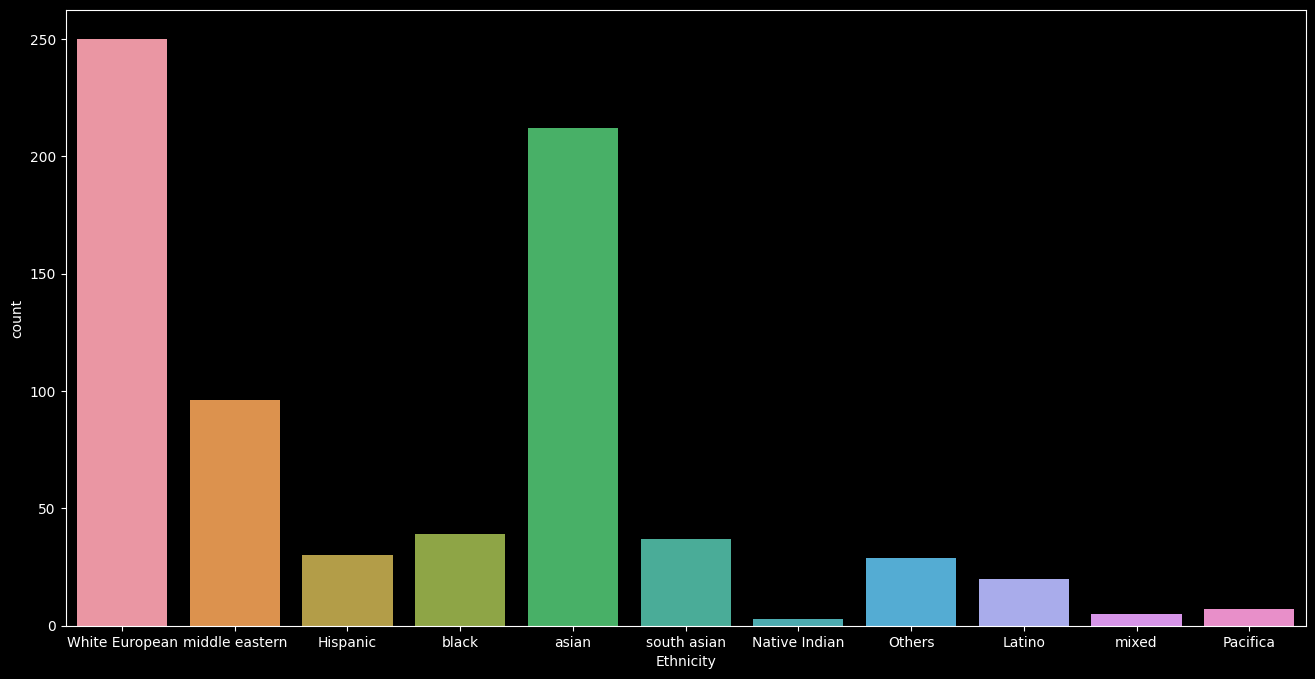

In [144]:
plt.figure(figsize = (16, 8)) 
sb.countplot(x = 'Ethnicity', data = yes_autism)

<Axes: xlabel='Jaundice', ylabel='count'>

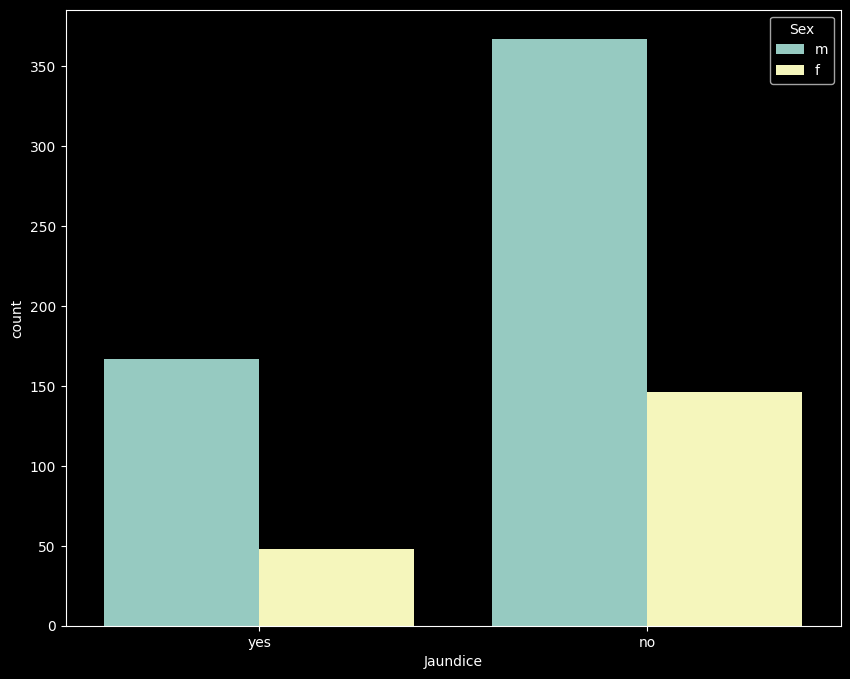

In [145]:
#Visualizing Juandice occurance in males and females
plt.figure(figsize = (10,8))

#plt.style.use('dark_background') 
sb.countplot(x = 'Jaundice', hue = 'Sex', data = yes_autism)

<Axes: xlabel='Qchat-10-Score', ylabel='count'>

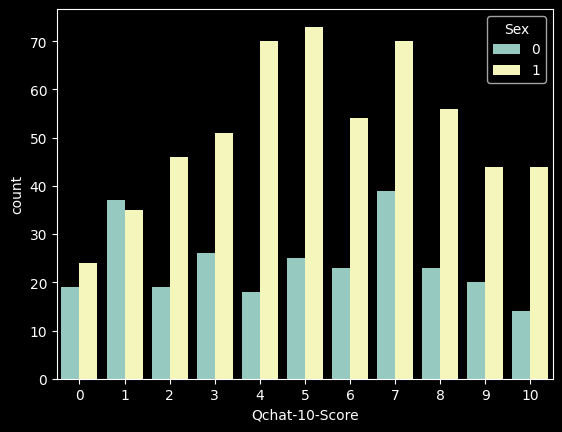

In [146]:
sb.countplot(x = 'Qchat-10-Score', hue = 'Sex', data = df) 

Text(0.5, 1.0, 'Age distribution of ASD positive')

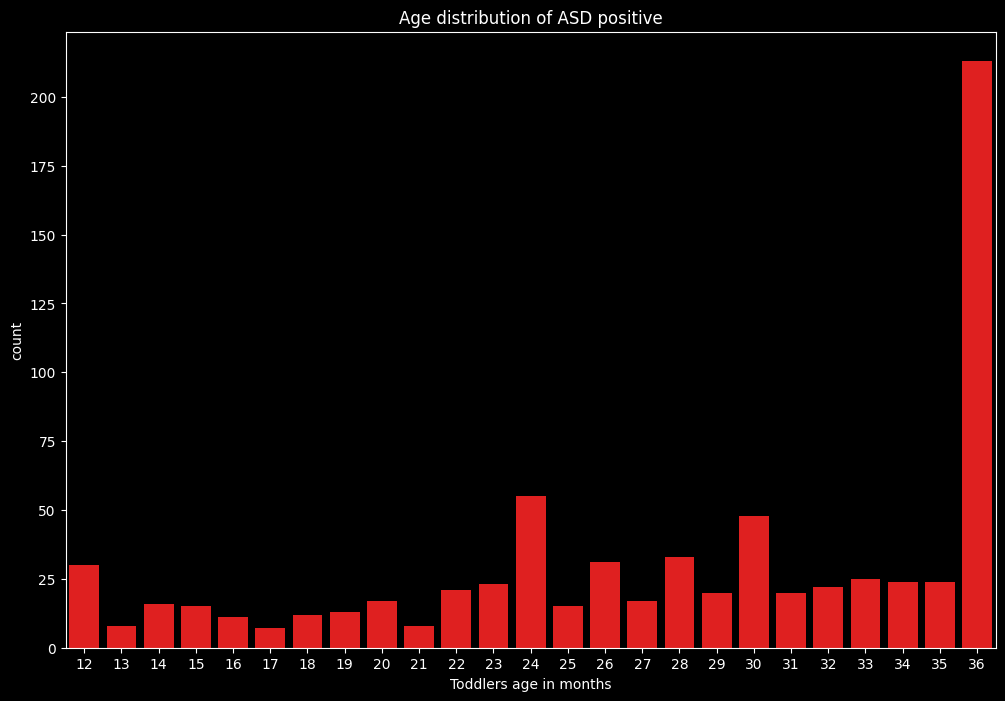

In [147]:
#VisuaLizing the age distribution of positive ASD among Todllers

f, ax = plt.subplots(figsize=(12, 8))
sb.countplot(x="Age_Mons", data=yes_autism, color="r");

plt.style.use('dark_background') 
ax.set_xlabel('Toddlers age in months') 
ax.set_title('Age distribution of ASD positive') 

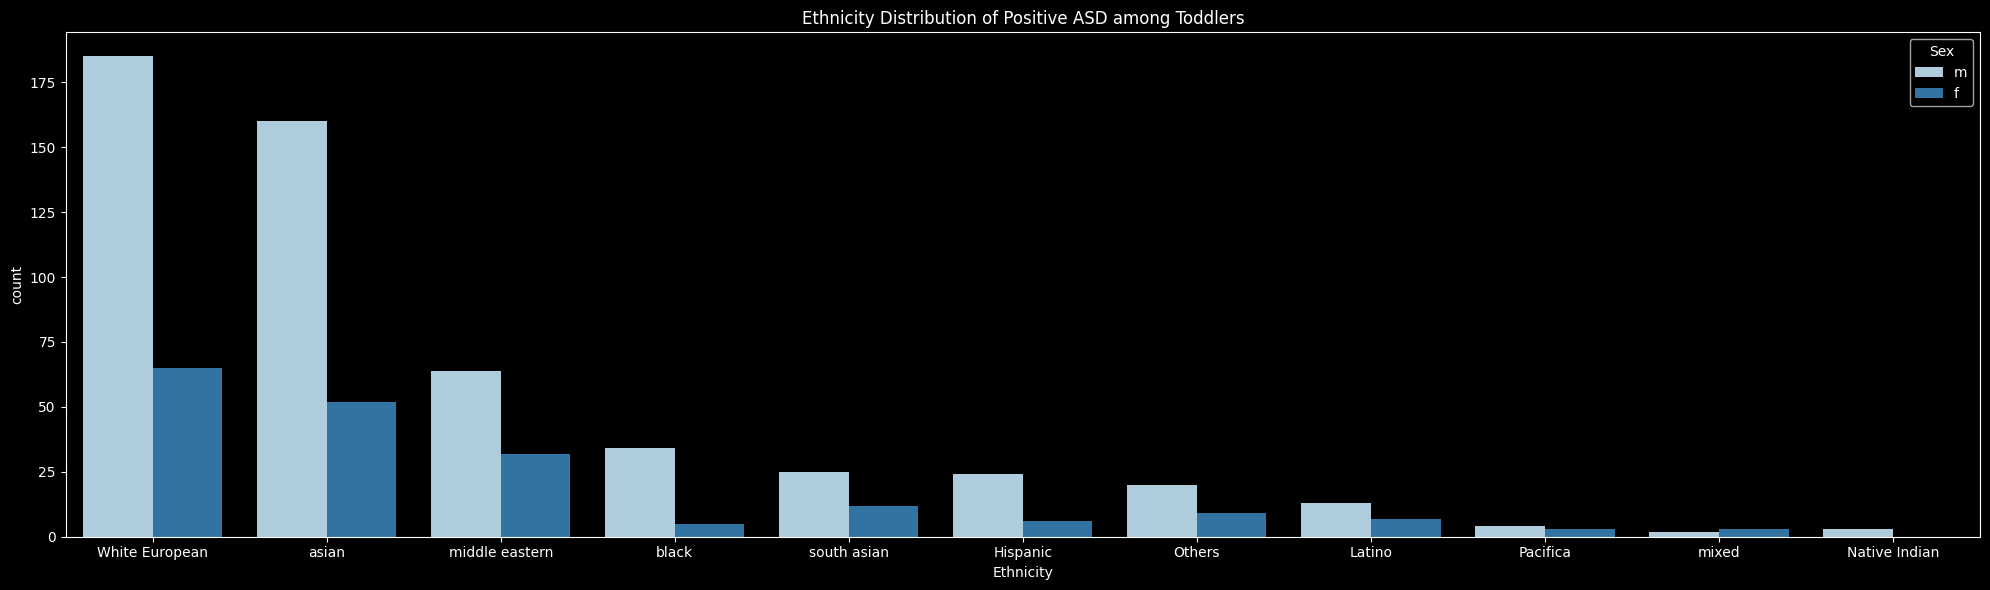

In [148]:
# visualize positive ASD among Toddlers based on Ethnicity 
plt.figure(figsize=(20,6)) 
sb.countplot(x='Ethnicity',data=yes_autism,order=yes_autism['Ethnicity'].value_counts().index[:11],hue='Sex',palette='Paired') 
plt.title('Ethnicity Distribution of Positive ASD among Toddlers') 
plt.xlabel('Ethnicity') 
plt.tight_layout( ) 

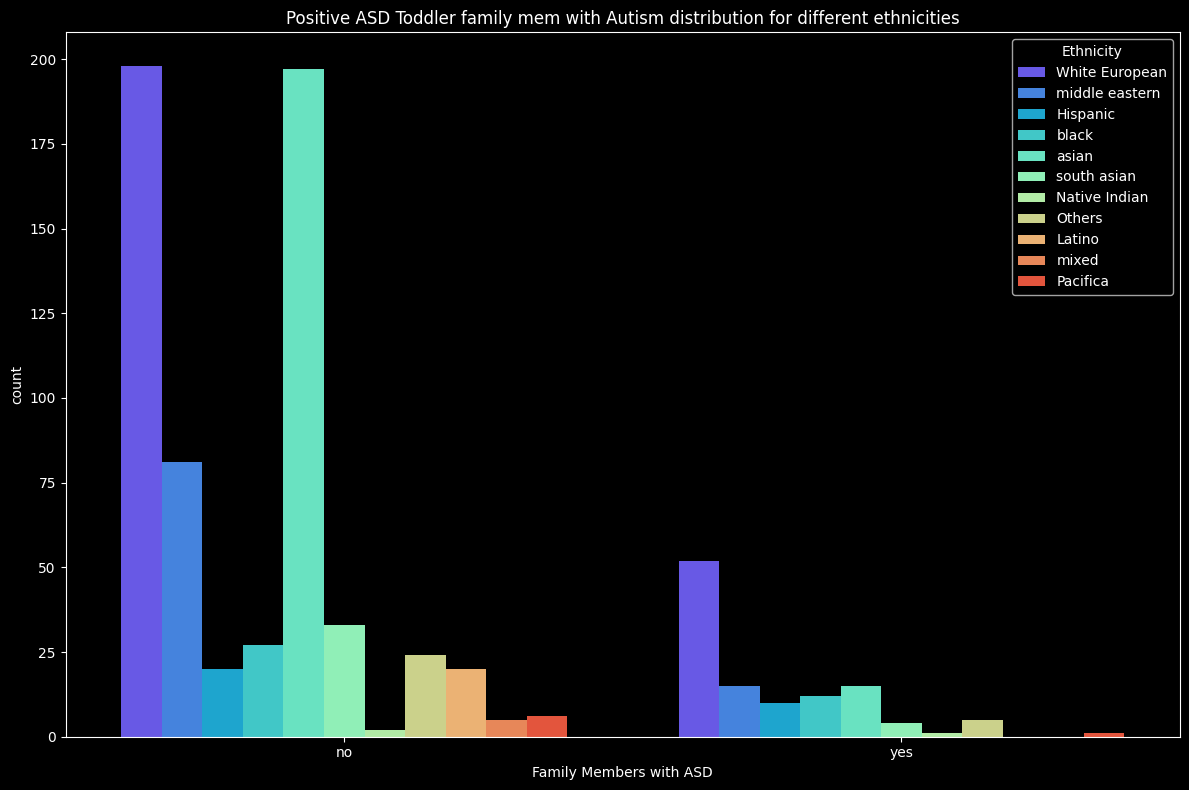

In [149]:
#Lets visualize the distribution of autism in family within different ethnicity 
 
f, ax = plt.subplots(figsize=(12,8)) 
sb.countplot(x='Family_mem_with_ASD',data=yes_autism,hue='Ethnicity',palette='rainbow',ax=ax) 
ax.set_title('Positive ASD Toddler family mem with Autism distribution for different ethnicities') 
ax.set_xlabel('Family Members with ASD') 
plt.tight_layout() 


In [150]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,28,3,0,8,1,0,0
1,1,1,0,0,0,1,1,0,0,0,36,4,1,5,1,0,1
2,1,0,0,0,0,0,1,1,0,1,36,4,1,8,1,0,1
5,1,1,0,0,1,1,1,1,1,1,21,8,1,7,0,0,1
6,1,0,0,1,1,1,0,0,1,0,33,5,1,6,1,0,1


In [151]:
 
X = df.drop(['Class/ASD Traits '], axis = 1)
y = df['Class/ASD Traits ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state =42)  


In [152]:
df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Class/ASD Traits '],
      dtype='object')

In [153]:
df.shape

(830, 17)

In [154]:
print(X.shape,X_test.shape,X_train.shape)

(830, 16) (332, 16) (498, 16)


In [155]:
print(y.shape)

(830,)


In [156]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)


Shape of X_train: (498, 16)
Shape of X_test: (332, 16)


In [157]:
import pickle
# Standardize the features
scaler = StandardScaler()
scaler.fit(X_train)
#X_test_scaled = scaler.transform(X_test)
# Step 2: Save the scaler using pickle
scalerfile = 'scaler.save'
with open(scalerfile, 'wb') as file:
    pickle.dump(scaler, file)

Accuracy=1.0
Time taken=0.05083417892456055
              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000       102
           1    1.00000   1.00000   1.00000       230

    accuracy                        1.00000       332
   macro avg    1.00000   1.00000   1.00000       332
weighted avg    1.00000   1.00000   1.00000       332



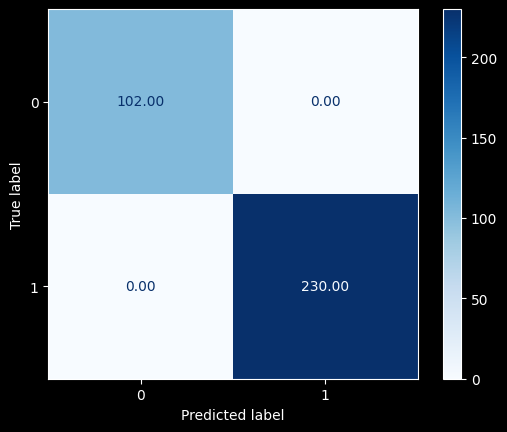

(LogisticRegression(), 1.0, 0.05083417892456055)

In [158]:
import time
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,ConfusionMatrixDisplay,roc_curve,classification_report
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
def run_model(imodel,X_train,y_train,X_test,y_test,verbose=True):
    # Initialize the logistic regression model
    
    t0=time.time()
    if verbose == False:
        imodel.fit(X_train,y_train)
    else:
        imodel.fit(X_train,y_train)
    y_pred=imodel.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    time_taken=time.time()-t0
    print("Accuracy={}".format(accuracy))
    print("Time taken={}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    cm=confusion_matrix(y_test,y_pred)
    disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=imodel.classes_)
    disp.plot(cmap=plt.cm.Blues,values_format='.2f')
    plt.show()
    return imodel,accuracy,time_taken
run_model(logistic_model,X_train,y_train,X_test,y_test)

Accuracy=1.0
Time taken=0.3529481887817383
              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000       102
           1    1.00000   1.00000   1.00000       230

    accuracy                        1.00000       332
   macro avg    1.00000   1.00000   1.00000       332
weighted avg    1.00000   1.00000   1.00000       332



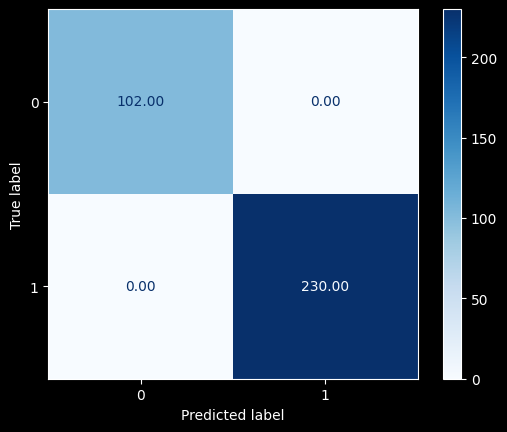

(RandomForestClassifier(), 1.0, 0.3529481887817383)

In [159]:
import time
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,ConfusionMatrixDisplay,roc_curve,classification_report
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test).astype(int)
def run_model(imodel,X_train,y_train,X_test,y_test,verbose=True):
    t0=time.time()
    if verbose == False:
        imodel.fit(X_train,y_train)
    else:
        imodel.fit(X_train,y_train)
    y_pred=imodel.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    time_taken=time.time()-t0
    print("Accuracy={}".format(accuracy))
    print("Time taken={}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    cm=confusion_matrix(y_test,y_pred)
    disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=imodel.classes_)
    disp.plot(cmap=plt.cm.Blues,values_format='.2f')
    plt.show()
    return imodel,accuracy,time_taken
run_model(RF,X_train,y_train,X_test,y_test)

Accuracy=0.9759036144578314
Time taken=0.03298187255859375
              precision    recall  f1-score   support

           0    0.97959   0.94118   0.96000       102
           1    0.97436   0.99130   0.98276       230

    accuracy                        0.97590       332
   macro avg    0.97698   0.96624   0.97138       332
weighted avg    0.97597   0.97590   0.97577       332



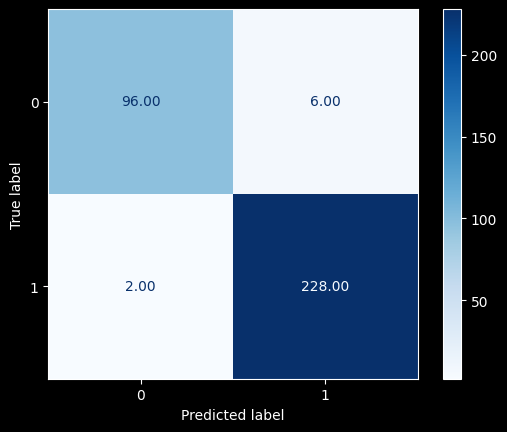

(SVC(), 0.9759036144578314, 0.03298187255859375)

In [160]:
import time
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,ConfusionMatrixDisplay,roc_curve,classification_report
SVM =  SVC()
SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test).astype(int) 
def run_model(imodel,X_train,y_train,X_test,y_test,verbose=True):
    t0=time.time()
    if verbose == False:
        imodel.fit(X_train,y_train)
    else:
        imodel.fit(X_train,y_train)
    y_pred=imodel.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    time_taken=time.time()-t0
    print("Accuracy={}".format(accuracy))
    print("Time taken={}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    cm=confusion_matrix(y_test,y_pred)
    disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=imodel.classes_)
    disp.plot(cmap=plt.cm.Blues,values_format='.2f')
    plt.show()
    return imodel,accuracy,time_taken
run_model(SVM,X_train,y_train,X_test,y_test)

Accuracy=0.9668674698795181
Time taken=0.06363296508789062
              precision    recall  f1-score   support

           0    0.95050   0.94118   0.94581       102
           1    0.97403   0.97826   0.97614       230

    accuracy                        0.96687       332
   macro avg    0.96226   0.95972   0.96098       332
weighted avg    0.96680   0.96687   0.96682       332



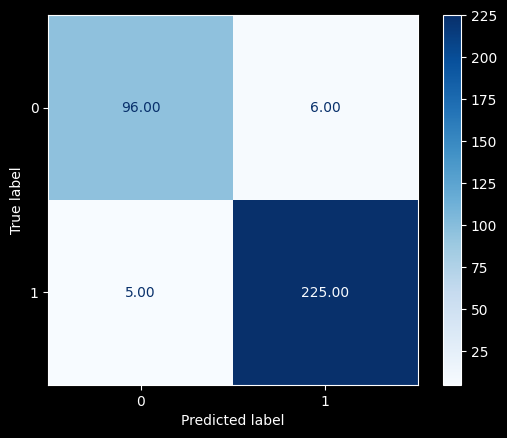

(KNeighborsClassifier(), 0.9668674698795181, 0.06363296508789062)

In [161]:
import time
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,ConfusionMatrixDisplay,roc_curve,classification_report
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test).astype(int) 
def run_model(imodel,X_train,y_train,X_test,y_test,verbose=True):
    t0=time.time()
    if verbose == False:
        imodel.fit(X_train,y_train)
    else:
        imodel.fit(X_train,y_train)
    y_pred=imodel.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    time_taken=time.time()-t0
    print("Accuracy={}".format(accuracy))
    print("Time taken={}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    cm=confusion_matrix(y_test,y_pred)
    disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=imodel.classes_)
    disp.plot(cmap=plt.cm.Blues,values_format='.2f')
    plt.show()
    return imodel,accuracy,time_taken
run_model(KNN,X_train,y_train,X_test,y_test)

Accuracy=0.9427710843373494
Time taken=0.018053054809570312
              precision    recall  f1-score   support

           0    0.93684   0.87255   0.90355       102
           1    0.94515   0.97391   0.95931       230

    accuracy                        0.94277       332
   macro avg    0.94099   0.92323   0.93143       332
weighted avg    0.94260   0.94277   0.94218       332



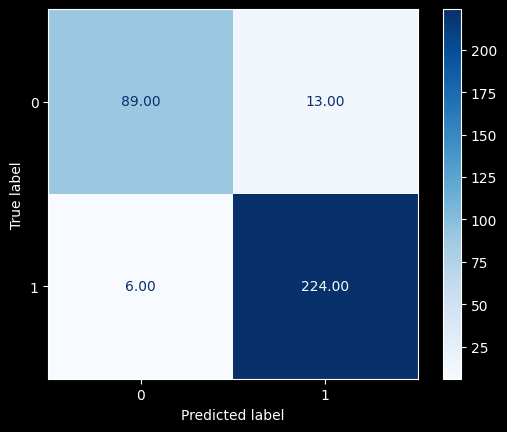

(GaussianNB(), 0.9427710843373494, 0.018053054809570312)

In [162]:
import time
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,ConfusionMatrixDisplay,roc_curve,classification_report
NB= GaussianNB()
NB.fit(X_train, y_train)
y_pred = NB.predict(X_test).astype(int) 

def run_model(imodel,X_train,y_train,X_test,y_test,verbose=True):
    t0=time.time()
    if verbose == False:
        imodel.fit(X_train,y_train)
    else:
        imodel.fit(X_train,y_train)
    y_pred=imodel.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    time_taken=time.time()-t0
    print("Accuracy={}".format(accuracy))
    print("Time taken={}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    cm=confusion_matrix(y_test,y_pred)
    disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=imodel.classes_)
    disp.plot(cmap=plt.cm.Blues,values_format='.2f')
    plt.show()
    return imodel,accuracy,time_taken
run_model(NB,X_train,y_train,X_test,y_test)

In [163]:
# KFold for logistic regression model

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k =5
kf = KFold(n_splits=k,shuffle=True)
mod = cross_val_score(logistic_model,X,y, scoring='accuracy', cv=kf)
accuracy=np.mean(mod)*100
print("accuracy:",accuracy)
p= cross_val_score(logistic_model,X, y, scoring='precision',cv=kf)
print("precision:",np.mean(p)*100)
f1 = cross_val_score(logistic_model,X, y, scoring='f1',cv=kf)
print("f1_score:",np.mean(f1)*100)
re= cross_val_score(logistic_model,X, y, scoring='recall',cv=kf)
print("Recall:",np.mean(re)*100)

accuracy: 100.0
precision: 100.0
f1_score: 100.0
Recall: 100.0


In [164]:
# KFold for RandomForestRegressor model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k =5
kf = KFold(n_splits=k,shuffle=True)
mod = cross_val_score(RF,X,y, scoring='accuracy', cv=kf)
accuracy=np.mean(mod)*100
print("accuracy:",accuracy)
p= cross_val_score(RF,X, y, scoring='precision',cv=kf)
print("precision:",np.mean(p)*100)
f1 = cross_val_score(RF,X, y, scoring='f1',cv=kf)
print("f1_score:",np.mean(f1)*100)
re= cross_val_score(RF,X, y, scoring='recall',cv=kf)
print("Recall:",np.mean(re)*100)

accuracy: 100.0
precision: 100.0
f1_score: 100.0
Recall: 100.0


In [165]:
# KFold for support vector mechine model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k =5
kf = KFold(n_splits=k,shuffle=True)
mod = cross_val_score(SVM,X,y, scoring='accuracy', cv=kf)
accuracy=np.mean(mod)*100
print("accuracy:",accuracy)
p= cross_val_score(SVM,X, y, scoring='precision',cv=kf)
print("precision:",np.mean(p)*100)
f1 = cross_val_score(SVM,X, y, scoring='f1',cv=kf)
print("f1_score:",np.mean(f1)*100)
re= cross_val_score(SVM,X, y, scoring='recall',cv=kf)
print("Recall:",np.mean(re)*100)

accuracy: 97.71084337349399
precision: 97.76429308959675
f1_score: 98.52863198704983
Recall: 98.75747115153895


In [166]:
# KFold for KNeighborsClassifiern model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k =5
kf = KFold(n_splits=k,shuffle=True)
mod = cross_val_score(KNN,X,y, scoring='accuracy', cv=kf)
accuracy=np.mean(mod)*100
print("accuracy:",accuracy)
p= cross_val_score(KNN,X, y, scoring='precision',cv=kf)
print("precision:",np.mean(p)*100)
f1 = cross_val_score(KNN,X, y, scoring='f1',cv=kf)
print("f1_score:",np.mean(f1)*100)
re= cross_val_score(KNN,X, y, scoring='recall',cv=kf)
print("Recall:",np.mean(re)*100)

accuracy: 97.46987951807229
precision: 99.08374384236453
f1_score: 97.76245475830689
Recall: 97.5701754385965


In [167]:
# KFold for GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k =5
kf = KFold(n_splits=k,shuffle=True)
mod = cross_val_score(NB,X,y, scoring='accuracy', cv=kf)
accuracy=np.mean(mod)*100
print("accuracy:",accuracy)
p= cross_val_score(NB,X, y, scoring='precision',cv=kf)
print("precision:",np.mean(p)*100)
f1 = cross_val_score(NB,X, y, scoring='f1',cv=kf)
print("f1_score:",np.mean(f1)*100)
re= cross_val_score(NB,X, y, scoring='recall',cv=kf)
print("Recall:",np.mean(re)*100)

accuracy: 97.71084337349399
precision: 97.82582214541735
f1_score: 97.98335124060704
Recall: 98.22194791287512


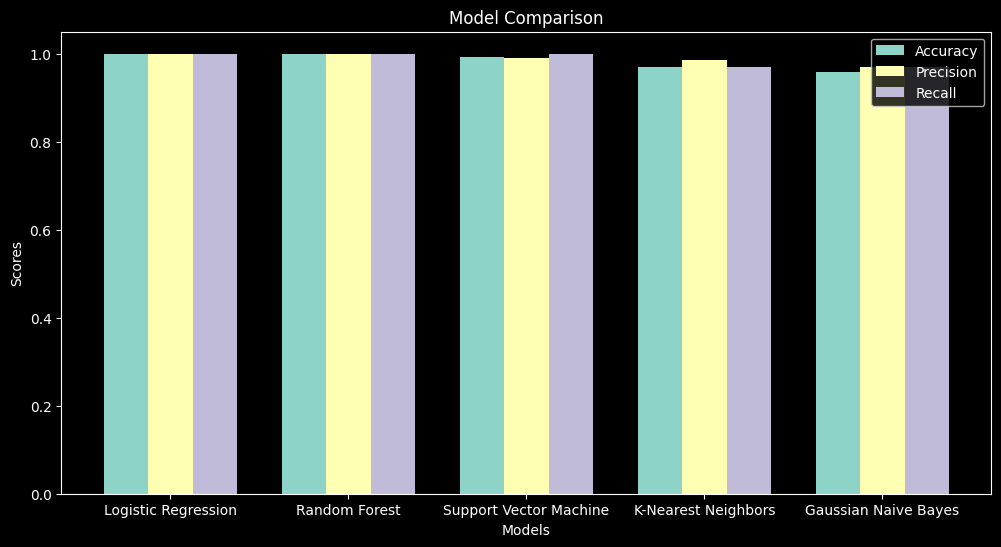

In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Load the data
df = pd.read_csv('train.csv')

# Data preprocessing
df.drop(['Case_No', 'Who completed the test'], axis=1, inplace=True)
le = LabelEncoder()
columns = ['Ethnicity', 'Family_mem_with_ASD', 'Sex', 'Jaundice', 'Class/ASD Traits ']
for col in columns:
    df[col] = le.fit_transform(df[col])

X = df.drop(['Class/ASD Traits '], axis=1)
y = df['Class/ASD Traits ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB()
}

accuracies = []
precisions = []
recalls = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary', pos_label=1)
    recall = recall_score(y_test, y_pred, average='binary', pos_label=1)
    
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)

# Plotting
plt.figure(figsize=(12, 6))
x = np.arange(len(models))
width = 0.25

plt.bar(x - width, accuracies, width, label='Accuracy')
plt.bar(x, precisions, width, label='Precision')
plt.bar(x + width, recalls, width, label='Recall')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Comparison')
plt.xticks(x, models.keys())
plt.legend()
plt.show()


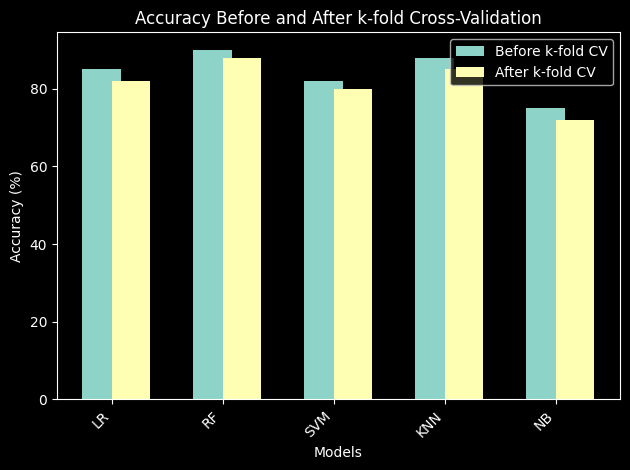

In [169]:
import numpy as np
import matplotlib.pyplot as plt

# Define the accuracy values obtained before k-fold cross-validation for each model
accuracy_before_cv = {
    'LR': 85.0,  # Enter the accuracy values for each model
    'RF': 90.0,
    'SVM': 82.0,
    'KNN': 88.0,
    'NB': 75.0
}

# Define the accuracy values obtained after k-fold cross-validation for each model
accuracy_after_cv = {
    'LR': 82.0,  # Enter the accuracy values for each model after k-fold CV
    'RF': 88.0,
    'SVM': 80.0,
    'KNN' : 85.0,
    'NB': 72.0
}

# Extract model names and accuracy values
models = list(accuracy_before_cv.keys())
acc_before = list(accuracy_before_cv.values())
acc_after = list(accuracy_after_cv.values())

# Generate positions for bar groups
x = np.arange(len(models))

# Define width of bars
width = 0.35

# Plotting the bar graph
fig, ax = plt.subplots()
bars1 = ax.bar(x - width/4, acc_before, width, label='Before k-fold CV')
bars2 = ax.bar(x + width/2, acc_after, width, label='After k-fold CV')

# Add labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Accuracy Before and After k-fold Cross-Validation')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()



# Show the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


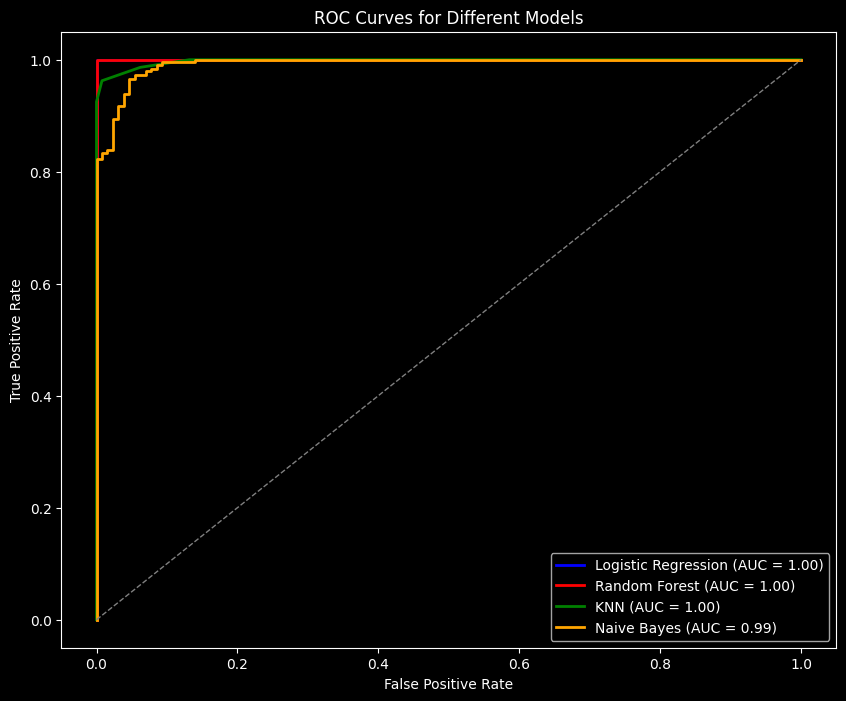

In [170]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate probabilities for Logistic Regression
lr_prob = logistic_model.predict_proba(X_test)[:, 1]
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_prob)
lr_auc = roc_auc_score(y_test, lr_prob)

# Calculate probabilities for Random Forest
rf_prob = RF.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_prob)
rf_auc = roc_auc_score(y_test, rf_prob)

# Calculate probabilities for KNN
knn_prob = KNN.predict_proba(X_test)[:, 1] if hasattr(KNN, "predict_proba") else KNN.decision_function(X_test)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_prob)
knn_auc = roc_auc_score(y_test, knn_prob)

# Calculate probabilities for Naive Bayes
nb_prob = NB.predict_proba(X_test)[:, 1]
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_prob)
nb_auc = roc_auc_score(y_test, nb_prob)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(lr_fpr, lr_tpr, color='blue', lw=2, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, color='red', lw=2, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(knn_fpr, knn_tpr, color='green', lw=2, label=f'KNN (AUC = {knn_auc:.2f})')
plt.plot(nb_fpr, nb_tpr, color='orange', lw=2, label=f'Naive Bayes (AUC = {nb_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc='lower right')
plt.show()


In [171]:
import joblib

# Dump RF model to ASD_final.pkl
joblib.dump(logistic_model, "ASD_final.pkl")

# Dump scaler object to scaler.pkl
joblib.dump(scaler,"scaler.pkl")

# Load both models
model = joblib.load('ASD_final.pkl')
scaler = joblib.load('scaler.pkl')
#print(scaler)

In [172]:
# # Initialize the XGBClassifier model
# XGB = XGBClassifier()
# # Train the model
# XGB.fit(X_train, y_train)

# # Make predictions
# y_pred = XGB.predict(X_test).astype(int) 

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# conf_matrix = confusion_matrix(y_test, y_pred)
# #classification_rep = classification_report(y_test, y_pred)

# # Extracting additional metrics
# tn, fp, fn, tp = conf_matrix.ravel()
# precision = tp / (tp + fp)
# recall = tp / (tp + fn)
# specificity = tn / (tn + fp)
# f1_score = 2 * (precision * recall) / (precision + recall)
# positive_predictive_value = tp / (tp + fp)
# negative_predictive_value = tn / (tn + fn)
# false_positive_rate = fp / (fp + tn)
# false_negative_rate = fn / (fn + tp)
# false_discovery_rate = fp / (fp + tp)
# false_omission_rate = fn / (fn + tn)
# #prevalence = (tp + fn) / (tp + fp + tn + fn)

# # Display metrics
# print(f"Accuracy: {accuracy:.2f}")
# print("\nConfusion Matrix:\n", conf_matrix)
# #print("\nClassification Report:\n", classification_rep)
# print(f"\nPrecision: {precision:.2f}")
# print(f"Recall: {recall:.2f}")
# print(f"Specificity: {specificity:.2f}")
# print(f"F1 Score: {f1_score:.2f}")
# print(f"Positive Predictive Value: {positive_predictive_value:.2f}")
# print(f"Negative Predictive Value: {negative_predictive_value:.2f}")
# print(f"False Positive Rate: {false_positive_rate:.2f}")
# print(f"False Negative Rate: {false_negative_rate:.2f}")
# print(f"False Discovery Rate: {false_discovery_rate:.2f}")
# print(f"False Omission Rate: {false_omission_rate:.2f}")
# #print(f"Prevalence: {prevalence:.2f}")

In [173]:
# from sklearn.ensemble import StackingClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.svm import SVC

# # Initialize the base models
# base_models = [
#     ('logistic', LogisticRegression()),
#     ('random_forest', RandomForestRegressor()),
#     ('svm', SVC())
# ]

# # Initialize the stacking model with a meta-classifier (e.g., Logistic Regression)
# stacking_model = StackingClassifier(estimators=base_models, final_estimator=SVC())

# # Train the stacking model
# stacking_model.fit(X_train, y_train)

# # Make predictions
# y_pred_stacking = stacking_model.predict(X_test)

# # Evaluate the stacking model
# accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
# conf_matrix_stacking = confusion_matrix(y_test, y_pred_stacking)

# # Extracting additional metrics for Stacking
# tn_stacking, fp_stacking, fn_stacking, tp_stacking = conf_matrix_stacking.ravel()
# precision_stacking = tp_stacking / (tp_stacking + fp_stacking)
# recall_stacking = tp_stacking / (tp_stacking + fn_stacking)
# specificity_stacking = tn_stacking / (tn_stacking + fp_stacking)
# f1_score_stacking = 2 * (precision_stacking * recall_stacking) / (precision_stacking + recall_stacking)
# positive_predictive_value_stacking = tp_stacking / (tp_stacking + fp_stacking)
# negative_predictive_value_stacking = tn_stacking / (tn_stacking + fn_stacking)
# false_positive_rate_stacking = fp_stacking / (fp_stacking + tn_stacking)
# false_negative_rate_stacking = fn_stacking / (fn_stacking + tp_stacking)
# false_discovery_rate_stacking = fp_stacking / (fp_stacking + tp_stacking)
# false_omission_rate_stacking = fn_stacking / (fn_stacking + tn_stacking)

# # Display metrics for Stacking
# print("Stacking Metrics:")
# print(f"Accuracy: {accuracy_stacking:.2f}")
# print("\nConfusion Matrix:\n", conf_matrix_stacking)
# print(f"\nPrecision: {precision_stacking:.2f}")
# print(f"Recall: {recall_stacking:.2f}")
# print(f"Specificity: {specificity_stacking:.2f}")
# print(f"F1 Score: {f1_score_stacking:.2f}")
# print(f"Positive Predictive Value: {positive_predictive_value_stacking:.2f}")
# print(f"Negative Predictive Value: {negative_predictive_value_stacking:.2f}")
# print(f"False Positive Rate: {false_positive_rate_stacking:.2f}")
# print(f"False Negative Rate: {false_negative_rate_stacking:.2f}")
# print(f"False Discovery Rate: {false_discovery_rate_stacking:.2f}")
# print(f"False Omission Rate: {false_omission_rate_stacking:.2f}")


In [174]:
# from sklearn.ensemble import BaggingClassifier
# #from sklearn.tree import DecisionTreeClassifier

# # Initialize the Bagging Classifier with a base estimator 
# bagging_model = BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=10)

# # Train the model
# bagging_model.fit(X_train, y_train)

# # Make predictions
# y_pred_bagging = bagging_model.predict(X_test)

# # Evaluate the Bagging model
# accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
# conf_matrix_bagging = confusion_matrix(y_test, y_pred_bagging)

# # Extracting additional metrics for Bagging
# tn_bagging, fp_bagging, fn_bagging, tp_bagging = conf_matrix_bagging.ravel()
# precision_bagging = tp_bagging / (tp_bagging + fp_bagging)
# recall_bagging = tp_bagging / (tp_bagging + fn_bagging)
# specificity_bagging = tn_bagging / (tn_bagging + fp_bagging)
# f1_score_bagging = 2 * (precision_bagging * recall_bagging) / (precision_bagging + recall_bagging)
# positive_predictive_value_bagging = tp_bagging / (tp_bagging + fp_bagging)
# negative_predictive_value_bagging = tn_bagging / (tn_bagging + fn_bagging)
# false_positive_rate_bagging = fp_bagging / (fp_bagging + tn_bagging)
# false_negative_rate_bagging = fn_bagging / (fn_bagging + tp_bagging)
# false_discovery_rate_bagging = fp_bagging / (fp_bagging + tp_bagging)
# false_omission_rate_bagging = fn_bagging / (fn_bagging + tn_bagging)

# # Display metrics for Bagging
# print("Bagging Metrics:")
# print(f"Accuracy: {accuracy_bagging:.2f}")
# print("\nConfusion Matrix:\n", conf_matrix_bagging)
# print(f"\nPrecision: {precision_bagging:.2f}")
# print(f"Recall: {recall_bagging:.2f}")
# print(f"Specificity: {specificity_bagging:.2f}")
# print(f"F1 Score: {f1_score_bagging:.2f}")
# print(f"Positive Predictive Value: {positive_predictive_value_bagging:.2f}")
# print(f"Negative Predictive Value: {negative_predictive_value_bagging:.2f}")
# print(f"False Positive Rate: {false_positive_rate_bagging:.2f}")
# print(f"False Negative Rate: {false_negative_rate_bagging:.2f}")
# print(f"False Discovery Rate: {false_discovery_rate_bagging:.2f}")
# print(f"False Omission Rate: {false_omission_rate_bagging:.2f}")
